### Лабораторная работа 5

In [1]:
from IPython.display import Image
from subprocess import call

from sklearn.neighbors import KNeighborsRegressor
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from sklearn.linear_model import ElasticNet, Lars
from sklearn.ensemble import RandomForestRegressor, StackingRegressor


from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, \
    LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier, RandomForestClassifier

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import BaggingRegressor
import pandas as pd
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import export_graphviz

from sklearn.metrics import roc_auc_score, r2_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import warnings
from functions import c_plots, r_plots

warnings.filterwarnings('ignore')

#### Выберем нужные данные из второй и третей лабораторной

2 лабораторная:

In [2]:
lab2 = pd.read_csv('./classif/train.csv')
lab2 = lab2.sample(n=1500, replace=False, random_state=42)
df_cat = ["Gender", "Vehicle_Age", "Vehicle_Damage"]
df_num = ["Age", "Driving_License", "Previously_Insured", "Region_Code",
          "Annual_Premium", "Policy_Sales_Channel", "Vintage"]
df_all = df_num + df_cat
result_col = "Response"
lab2.drop("id", axis=1, inplace=True, errors="ignore")

le = LabelEncoder()
for col in df_cat:
    lab2[col] = le.fit_transform(lab2[col])
    lab2[col] = le.fit_transform(lab2[col])

scaler = MinMaxScaler()
lab2[df_all] = scaler.fit_transform(lab2[df_all])
lab2[df_all] = scaler.fit_transform(lab2[df_all])

x = lab2[df_all]
y = lab2[result_col]

x2, y2 = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'),
                  random_state=7).fit_resample(x, y)

3 лабораторная:

In [3]:
df_train_3 = pd.read_csv('./regression/train.csv')
df_train_3.drop('id', axis=1, inplace=True)
corr_matrix = df_train_3.corr()
target = 'Цена'
cors = {}
for f in df_train_3.columns:
    cors[f] = df_train_3[target].corr(df_train_3[f])
threshold = 0.29
weakly_correlated = [f for f, corr in cors.items() if abs(corr) < threshold]
df_train_3.drop(weakly_correlated, axis=1, inplace=True)

features = df_train_3.drop('Цена', axis=1)
corr_matrix = features.corr()

high_corr_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.75:
            high_corr_features.add(
                (corr_matrix.columns[i], corr_matrix.columns[j]))

price_corr = df_train_3.corr()['Цена']
to_drop = set()
for feat1, feat2 in high_corr_features:
    if abs(price_corr[feat1]) < abs(price_corr[feat2]):
        to_drop.add(feat1)
    else:
        to_drop.add(feat2)

df_train_3.drop(to_drop, axis=1, inplace=True)

x3 = df_train_3.loc[:, df_train_3.columns != 'Цена']
y3 = df_train_3['Цена']
df_train_3.head(10)

,Общая.площадь,Раздельный.санузел,Лифт,Мусоропровод,Стоматология.1000,Остановка.1000,Одежда..1000,Бар.1000,Цена
0,46.0,0,0,0,7,11,2,2,2350000.0
1,44.6,0,0,0,5,8,3,1,1799000.0
2,53.0,0,1,1,8,13,4,3,2800000.0
3,64.0,0,0,0,15,16,31,28,3970000.0
4,33.3,0,0,1,2,2,1,0,1880000.0
5,46.0,0,0,0,16,18,38,9,2400000.0
6,45.0,0,1,1,15,8,8,4,2870000.0
7,54.5,1,1,1,7,17,11,2,2700000.0
8,86.0,0,1,1,27,11,16,12,3200000.0
9,42.0,0,0,0,9,3,22,2,2560000.0


#### Построение ансамблей моделей

##### Классификация

In [4]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.3,
                                                        random_state=42)

Бэггинг

Лучшая модель: DecisionTreeClassifier
Лучший скор: 0.9667897203906421


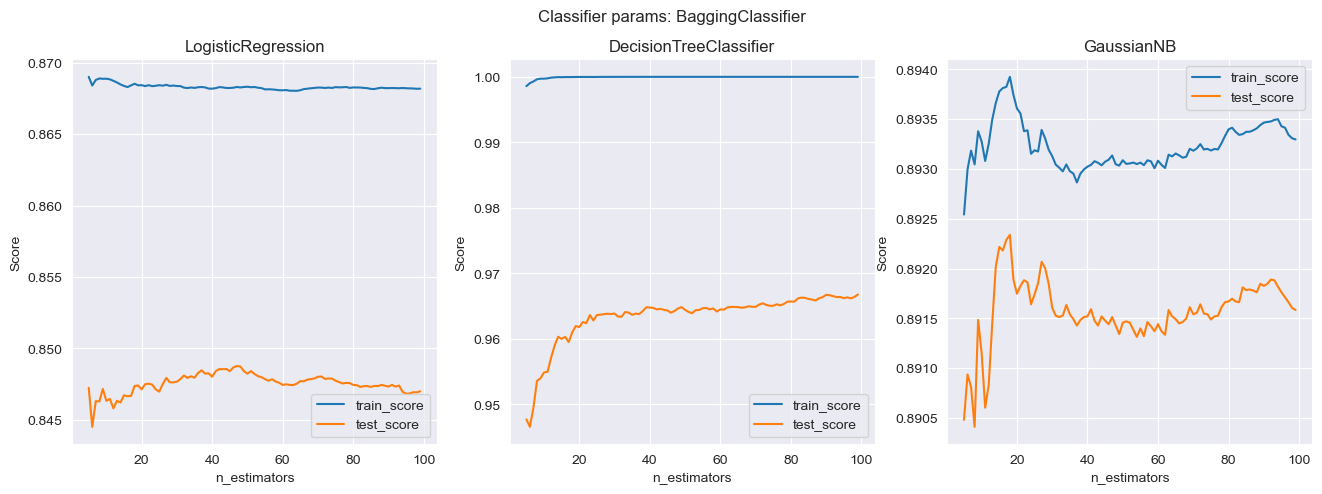

In [5]:
clfs = {"LogisticRegression": LogisticRegression,
        "DecisionTreeClassifier": DecisionTreeClassifier,
        "GaussianNB": GaussianNB}
c_model_bag, c_score_bag = c_plots(BaggingClassifier, "BaggingClassifier", clfs, x_train2, y_train2, x_test2, y_test2)
print(f"Лучшая модель: {c_model_bag}")
print(f"Лучший скор: {c_score_bag}")

Бустинг

Лучшая модель: DecisionTreeClassifier
Лучший скор: 0.9185853800795226


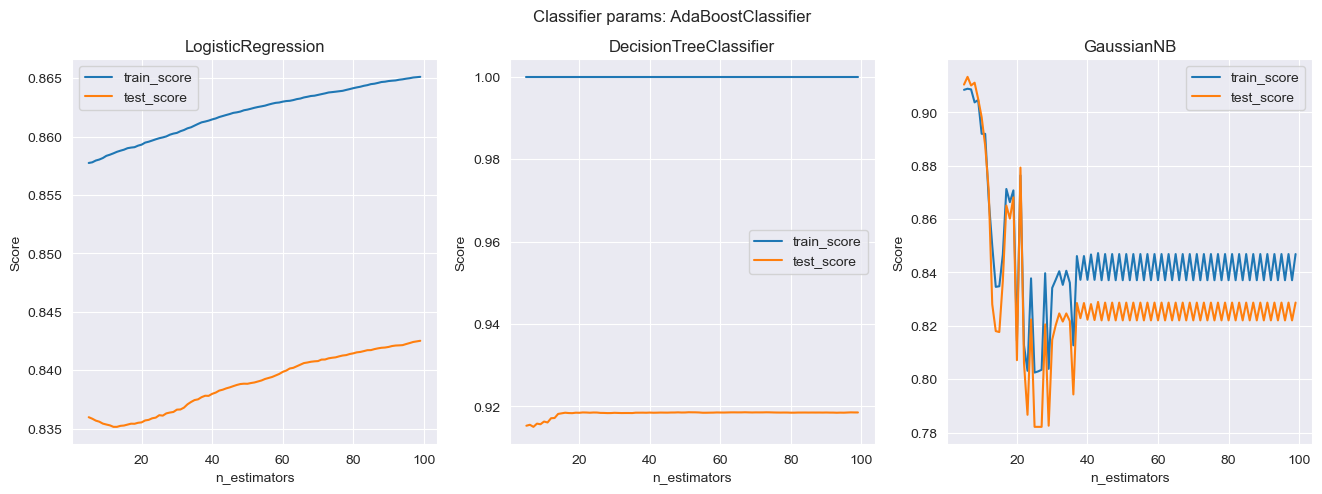

In [6]:
c_model_boo, c_score_boo = c_plots(AdaBoostClassifier, "AdaBoostClassifier", clfs, x_train2, y_train2, x_test2, y_test2)
print(f"Лучшая модель: {c_model_boo}")
print(f"Лучший скор: {c_score_boo}")

Стекинг

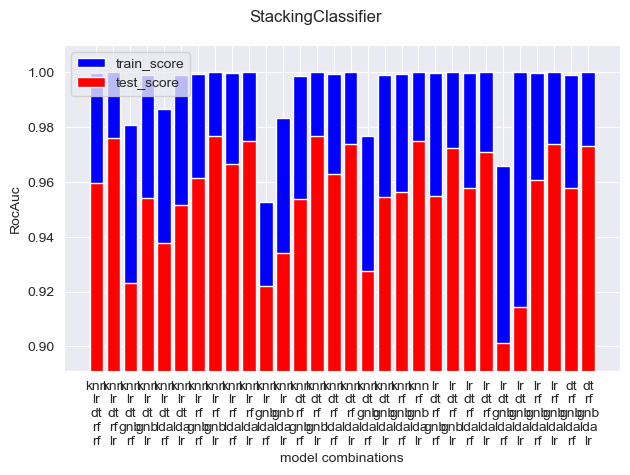

Лучший скор: 0.97685451920136


In [7]:
from itertools import combinations

base_models  = [
    ('knn', KNeighborsClassifier()),
    ('lr', LogisticRegression()),
    ('dt', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier()),
    ('gnb', GaussianNB()),
    ('lda', LinearDiscriminantAnalysis()),

]

meta_models  = [('rf', RandomForestClassifier()), ('lr', LogisticRegression())]
combs = []
tr_scores = []
tt_scores = []
for combo in combinations(base_models, 4):
    for meta in meta_models:
        stack = StackingClassifier(estimators = list(combo), final_estimator=meta[1])
        stack.fit(x_train2, y_train2)
        combs.append('\n'.join(map(lambda x: x[0], combo)) + '\n' + meta[0])
        tr_scores.append(roc_auc_score(y_train2, stack.predict_proba(x_train2)[:, 1]))
        tt_scores.append(roc_auc_score(y_test2, stack.predict_proba(x_test2)[:, 1]))


fig, ax = plt.subplots()
fig.suptitle("StackingClassifier")

ax.bar(combs, tr_scores, color="b", label="train_score")
ax.bar(combs, tt_scores, color="r", label="test_score")
ax.set_xticks(range(len(combs)))
ax.set_xticklabels(combs)
ax.set_xlabel("model combinations")
ax.set_ylabel("RocAuc")
ax.set_ylim([min(tt_scores) - 0.01, max(tr_scores) + 0.01])
ax.legend()
plt.tight_layout()
plt.show()
c_score_st = max(tt_scores)
print(f'Лучший скор: {c_score_st}')

##### Регрессия

In [8]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size=0.3,
                                                        random_state=42)

Беггинг

Лучшая модель: DecisionTreeRegressor
Лучший скор: 0.9011619687202894


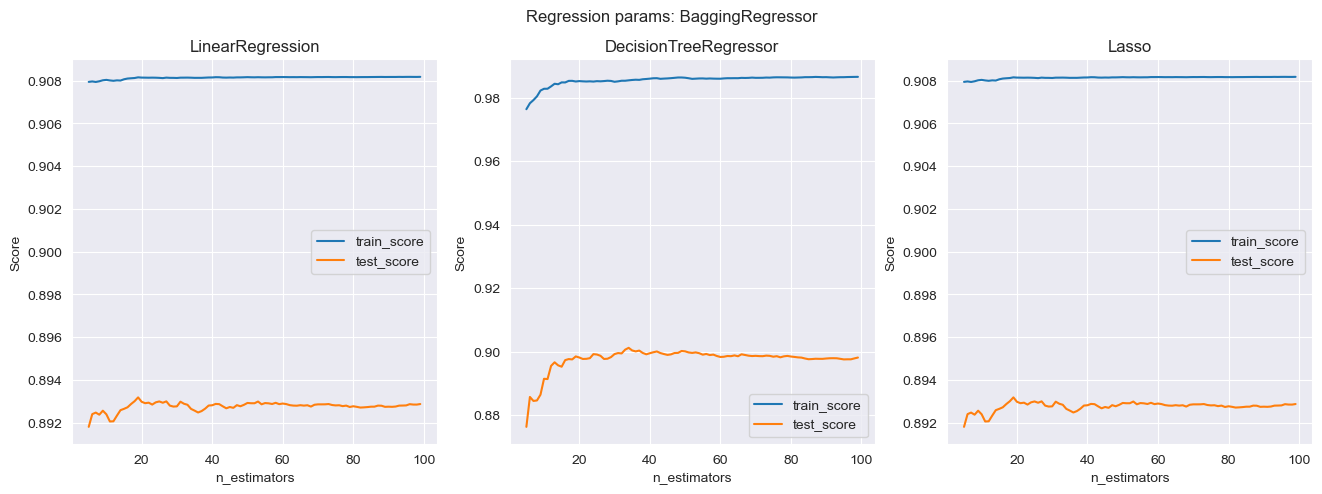

In [9]:
clfs = {"LinearRegression": LinearRegression,
        "DecisionTreeRegressor": DecisionTreeRegressor,
        "Lasso": Lasso}
r_model_bag, r_score_bag = r_plots(BaggingRegressor, "BaggingRegressor", clfs, x_train3, y_train3, x_test3, y_test3)
print(f"Лучшая модель: {r_model_bag}")
print(f"Лучший скор: {r_score_bag}")

Бустинг

Лучшая модель: DecisionTreeRegressor
Лучший скор: 0.899185343159022


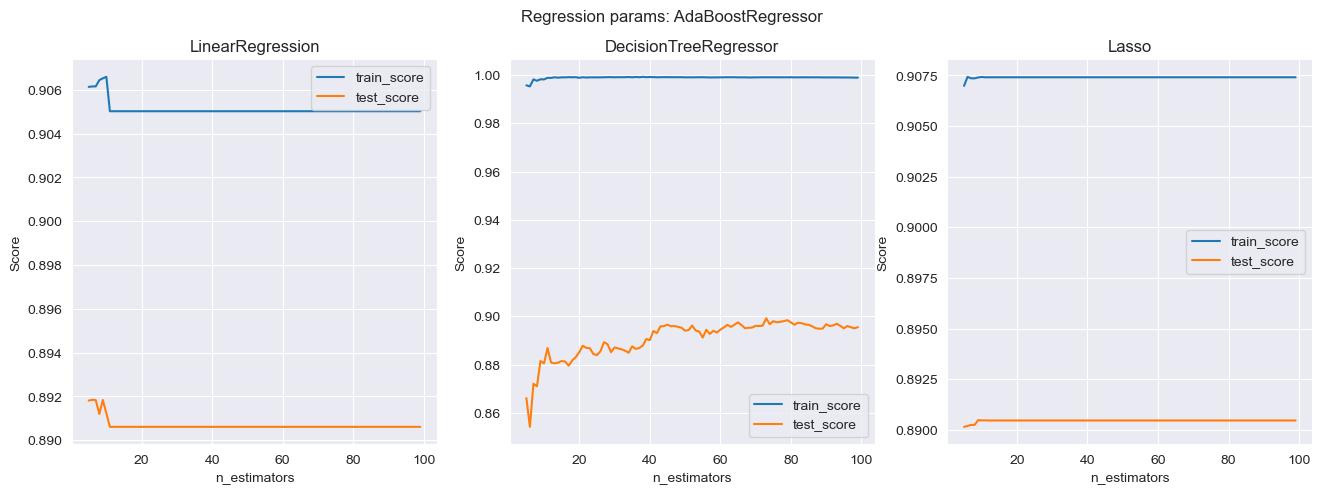

In [10]:
r_model_boo, r_score_boo = r_plots(AdaBoostRegressor, "AdaBoostRegressor", clfs, x_train3, y_train3, x_test3, y_test3)
print(f"Лучшая модель: {r_model_boo}")
print(f"Лучший скор: {r_score_boo}")

Стеккинг

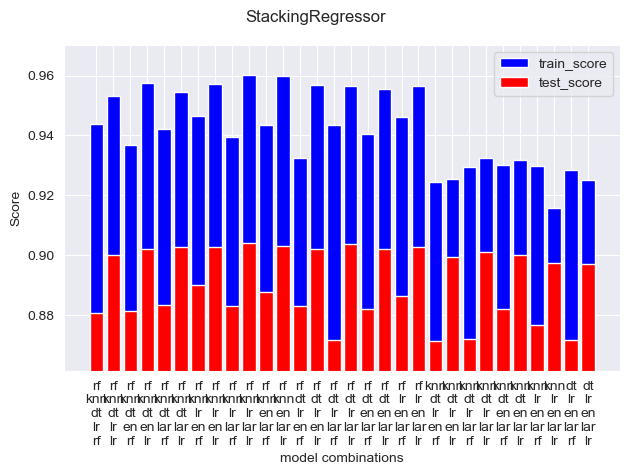

Лучший скор: 0.9039669481569074


In [14]:
base_models  = [
    ('rf', RandomForestRegressor()),
    ('knn', KNeighborsRegressor()),
    ('dt', DecisionTreeRegressor()),
    ('lr', LinearRegression()),
    ('en', ElasticNet()),
    ('lar', Lars()),
]

meta_models  = [('rf', RandomForestRegressor()), ('lr', LinearRegression())]
# best_scores = []
# for models in base_models:
#     for meta in meta_models:
#         stack = StackingRegressor(estimators = models, final_estimator=meta)
#         stack.fit(x_train3, y_train3)
#         best_scores.append(stack.score(x_test3, y_test3))
combs = []
tr_scores = []
tt_scores = []
for combo in combinations(base_models, 4):
    for meta in meta_models:
        stack = StackingRegressor(estimators = list(combo), final_estimator=meta[1])
        stack.fit(x_train3, y_train3)
        combs.append('\n'.join(map(lambda x: x[0], combo)) + '\n' + meta[0])
        tr_scores.append(stack.score(x_train3, y_train3))
        tt_scores.append(stack.score(x_test3, y_test3))


fig, ax = plt.subplots()
fig.suptitle("StackingRegressor")

ax.bar(combs, tr_scores, color="b", label="train_score")
ax.bar(combs, tt_scores, color="r", label="test_score")
ax.set_xticks(range(len(combs)))
ax.set_xticklabels(combs)
ax.set_xlabel("model combinations")
ax.set_ylabel("Score")
ax.set_ylim([min(tt_scores) - 0.01, max(tr_scores) + 0.01])
ax.legend()
plt.tight_layout()
plt.show()
r_score_st = max(tt_scores)
print(f'Лучший скор: {r_score_st}')

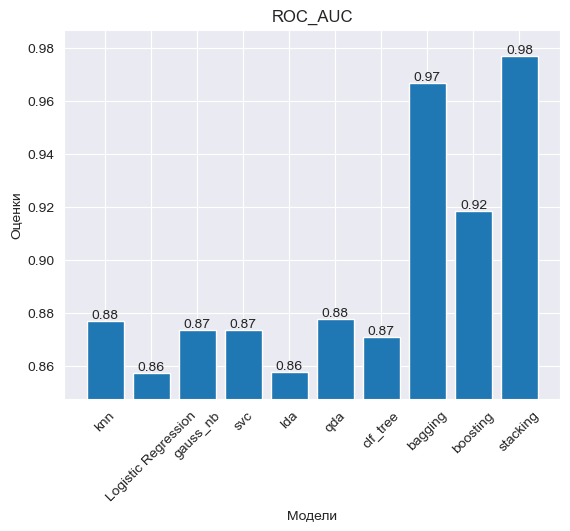

In [15]:
all_clfs_names = ['knn', 'Logistic Regression', 'gauss_nb', 'svc', 'lda', 'qda', 'clf_tree', 'bagging', 'boosting', 'stacking']
all_scores = [0.8768731484610126, 0.8573745275383273, 0.8735246623028627, 0.8735668990012495, 0.8577801962926002, 0.8777041309455519, 0.8707170017133947, c_score_bag, c_score_boo, c_score_st]

plt.bar(all_clfs_names, all_scores)
plt.xticks(rotation=45)

plt.gca().set_title('ROC_AUC')
plt.gca().set_xlabel('Модели')
plt.gca().set_ylabel('Оценки')

for i, score in enumerate(all_scores):
    plt.gca().text(i, score+0.001, f'{score:.2f}', horizontalalignment='center')
plt.gca().set_ylim([min(all_scores) - 0.01, max(all_scores) + 0.01])

plt.show()

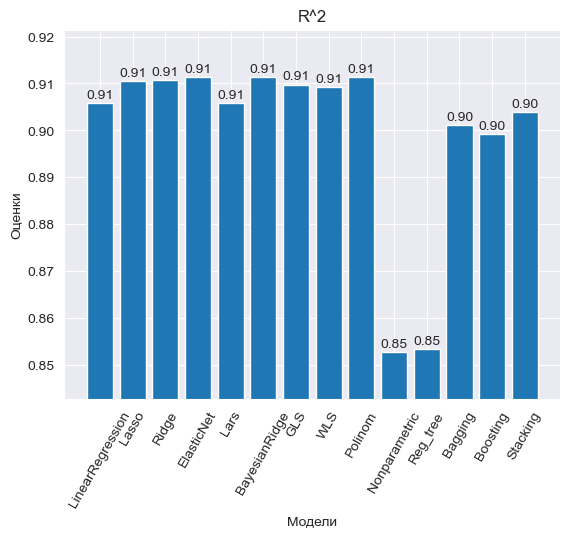

In [16]:
all_clfs_names = ['LinearRegression', 'Lasso', 'Ridge', 'ElasticNet', 'Lars', 'BayesianRidge', 'GLS', 'WLS', 'Polinom', 'Nonparametric', 'Reg_tree', 'Bagging', 'Boosting', 'Stacking']
all_scores = [0.9057608593460179, 0.9105815321255123, 0.9108238226706903, 0.9114448335602456, 0.9057608593460179, 0.9114271999548514, 0.9097671607768908, 0.9092469697987928, 0.9114001914893821, 0.8527314851041514, 0.8534801310103777, r_score_bag, r_score_boo, r_score_st]

plt.bar(all_clfs_names, all_scores)
plt.xticks(rotation=60)

plt.gca().set_title('R^2')
plt.gca().set_xlabel('Модели')
plt.gca().set_ylabel('Оценки')

for i, score in enumerate(all_scores):
    plt.gca().text(i, score+0.001, f'{score:.2f}', horizontalalignment='center')
plt.gca().set_ylim([min(all_scores) - 0.01, max(all_scores) + 0.01])

plt.show()